<h1 align="center">MSIN0114: Business Analytics Consulting Project</h1>
<h2 align="center">Recoverability of Client X projects: run 1</h2>

# Table of Contents

* [Part 6](#part6): Classification
    * [6.0](#6_0): Data splitting
    * [6.1](#6_1): Models
    * [6.2](#6_2): Models comparison
<br />
<br />
* [Part 7](#part7): Fine-tuning
    * [7.1](#7_1): XGBoost grid search
    * [7.2](#7_2): Random forest classifier grid earch
    * [7.3](#7_3): Support vector machines grid earch
<br />
<br />
* [Part 8](#part8): Ensemble learning
    * [8.1](#8_1): Voting classifiers
    * [8.2](#8_2): Stacking
<br />
<br />
* [Part 9](#part9): Evaluation of the final model
    * [9.1](#9_1): Confusion matrix
    * [9.2](#9_2): Cost matrix
    * [9.3](#9_3): ROC curve
    * [9.4](#9_4): Prediction-recall curve
    * [9.5](#9_5): Feature importance

## Notebook Setup

In [1]:
# Essentials
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import sqlite3
import pyodbc
import numpy as np; np.random.seed(1)

# Image creation and display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from sklearn.inspection import permutation_importance
from mlxtend.evaluate import feature_importance_permutation
from yellowbrick.features import Rank2D
from yellowbrick.classifier import ROCAUC

# Preprocessing
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.decomposition import PCA

# Metrics of accuracy
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from pycm import *
import imbalanced_ensemble as imbens
from imbalanced_ensemble.ensemble.base import sort_dict_by_key
from collections import Counter

# Fine-tuning and enseble learning
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV

#- Other
import itertools as it
import io
import os
os.sys.path
import sys
import glob
import concurrent.futures
from __future__ import print_function
import binascii
import struct
from PIL import Image
import scipy
import scipy.misc
import scipy.cluster
import datetime, time
import functools, operator
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

In [2]:
df = pd.read_csv('../csv-files/binary_data.csv')

## Part 6: <a class="anchor" id="part6"></a> Classification

### 6.0 <a class="anchor" id="6_0"></a> Data splitting

In [60]:
# Choose dependent variables
Y = df[['Rec_Class']]

# Drop the dependent variables from the feature data set
X = df.drop(columns = ['Rec_Class', 'Profit_Class'])

# Scale the explanatory variables
X1 = pd.DataFrame(preprocessing.normalize(X))
X1.columns = X.columns
X = X1

# Split data set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify = Y)

print(f'No. of training data: {X_train.shape[0]}')
print(f'No. of training targets: {Y_train.shape[0]}')
print(f'No. of testing data: {X_test.shape[0]}')
print(f'No. of testing targets: {Y_test.shape[0]}')

No. of training data: 7437
No. of training targets: 7437
No. of testing data: 1860
No. of testing targets: 1860


In [61]:
for i in range(2):
    print(f'Class {i} has {(Y.Rec_Class==i).sum()} samples in full dataset.')
    print(f'Class {i} has {(Y_train.Rec_Class==i).sum()} samples in training set.')
    print(f'Class {i} has {(Y_test.Rec_Class==i).sum()} samples in test set.')

Class 0 has 4649 samples in full dataset.
Class 0 has 3719 samples in training set.
Class 0 has 930 samples in test set.
Class 1 has 4648 samples in full dataset.
Class 1 has 3718 samples in training set.
Class 1 has 930 samples in test set.


### 6.1 <a class="anchor" id="6_1"></a> Models

#### 6.1.1  <a class="anchor" id="6_1_1"></a> Logistic Regression

In [6]:
# Create a logistic regression classifier model
log = LogisticRegression(random_state = 1, max_iter = 30000)

# Train the model using train set
log.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
log_y_pred=log.predict(X_test)

# Accuracy measures
print('Accuracy score of LOG: ' + str(round(metrics.accuracy_score(Y_test, np.round(log_y_pred)), 3)*100)+'%')
print('Precision score of LOG: ' + str(round(metrics.precision_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('Recall score of LOG: ' + str(round(metrics.recall_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('F1 of LOG: ' + str(round(metrics.f1_score(Y_test, np.round(log_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of LOG: 61.9%
Precision score of LOG: 61.9%
Recall score of LOG: 61.9%
F1 of LOG: 61.9%


**Normalised independent variables**

In [62]:
# Create a logistic regression model
log = LogisticRegression(random_state = 1, max_iter = 30000)

# Train the model using train set
log.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
log_y_pred=log.predict(X_test)

# Accuracy measures
print('Accuracy score of LOG: ' + str(round(metrics.accuracy_score(Y_test, np.round(log_y_pred)), 3)*100)+'%')
print('Precision score of LOG: ' + str(round(metrics.precision_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('Recall score of LOG: ' + str(round(metrics.recall_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('F1 of LOG: ' + str(round(metrics.f1_score(Y_test, np.round(log_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of LOG: 68.30000000000001%
Precision score of LOG: 68.30000000000001%
Recall score of LOG: 68.30000000000001%
F1 of LOG: 68.30000000000001%


#### 6.1.2  <a class="anchor" id="6_1_2"></a> Ridge regression classifier

In [7]:
# Create a ridge regression classifier model
rdg = RidgeClassifier(alpha=1.0, random_state = 1, max_iter = 30000)

# Train the model using train set
rdg.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
rdg_y_pred=rdg.predict(X_test)

# Accuracy measures
print('Accuracy score of RDG: ' + str(round(metrics.accuracy_score(Y_test, np.round(rdg_y_pred)), 3)*100)+'%')
print('Precision score of RDG: ' + str(round(metrics.precision_score(Y_test, np.round(rdg_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('Recall score of RDG: ' + str(round(metrics.recall_score(Y_test, np.round(rdg_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('F1 of RDG: ' + str(round(metrics.f1_score(Y_test, np.round(rdg_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of RDG: 59.9%
Precision score of RDG: 59.9%
Recall score of RDG: 59.9%
F1 of RDG: 59.9%


**Normalised independent variables**

In [63]:
# Create a ridge regression classifier model
rdg = RidgeClassifier(alpha=1.0, random_state = 1, max_iter = 30000)

# Train the model using train set
rdg.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
rdg_y_pred=rdg.predict(X_test)

# Accuracy measures
print('Accuracy score of RDG: ' + str(round(metrics.accuracy_score(Y_test, np.round(rdg_y_pred)), 3)*100)+'%')
print('Precision score of RDG: ' + str(round(metrics.precision_score(Y_test, np.round(rdg_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('Recall score of RDG: ' + str(round(metrics.recall_score(Y_test, np.round(rdg_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('F1 of RDG: ' + str(round(metrics.f1_score(Y_test, np.round(rdg_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of RDG: 68.10000000000001%
Precision score of RDG: 68.10000000000001%
Recall score of RDG: 68.10000000000001%
F1 of RDG: 68.10000000000001%


#### 6.1.3 <a class="anchor" id="6_1_3"></a> K-Neighbours classifier

In [8]:
# Create a k-Neighbours classifier model with 3 neighbours
np.random.seed(1)
knn_3 = KNeighborsClassifier(n_neighbors = 3)

# Train the model using train set
knn_3.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
knn_3_y_pred = knn_3.predict(X_test)

# Accuracy measures
print('Accuracy score of KNN-3: ' + str(round(metrics.accuracy_score(Y_test, np.round(knn_3_y_pred)), 3)*100)+'%')
print('Precision score of KNN-3: ' + str(round(metrics.precision_score(Y_test, np.round(knn_3_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of KNN-3 ' + str(round(metrics.recall_score(Y_test, np.round(knn_3_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of KNN-3: ' + str(round(metrics.f1_score(Y_test, np.round(knn_3_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of KNN-3: 61.9%
Precision score of KNN-3: 61.9%
Recall score of KNN-3 61.9%
F1 of KNN-3: 61.9%


In [9]:
# Create a k-Neighbours classifier model with 7 neighbours
np.random.seed(1)
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train the model using train set
knn_7.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
knn_7_y_pred = knn_7.predict(X_test)

# Accuracy measures
print('Accuracy score of KNN-7: ' + str(round(metrics.accuracy_score(Y_test, np.round(knn_7_y_pred)), 3)*100)+'%')
print('Precision score of KNN-7: ' + str(round(metrics.precision_score(Y_test, np.round(knn_7_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of KNN-7 ' + str(round(metrics.recall_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of KNN-7: ' + str(round(metrics.f1_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of KNN-7: 62.4%
Precision score of KNN-7: 62.4%
Recall score of KNN-7 62.4%
F1 of KNN-7: 62.4%


**Normalised independent variables**

In [19]:
# Create a k-Neighbours classifier model with 7 neighbours
np.random.seed(1)
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train the model using train set
knn_7.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
knn_7_y_pred = knn_7.predict(X_test)

# Accuracy measures
print('Accuracy score of KNN-7: ' + str(round(metrics.accuracy_score(Y_test, np.round(knn_7_y_pred)), 3)*100)+'%')
print('Precision score of KNN-7: ' + str(round(metrics.precision_score(Y_test, np.round(knn_7_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of KNN-7 ' + str(round(metrics.recall_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of KNN-7: ' + str(round(metrics.f1_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of KNN-7: 63.9%
Precision score of KNN-7: 63.9%
Recall score of KNN-7 63.9%
F1 of KNN-7: 63.9%


In [64]:
# Create a k-Neighbours classifier model with 100 neighbours
np.random.seed(1)
knn_100 = KNeighborsClassifier(n_neighbors=100)

# Train the model using train set
knn_100.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
knn_100_y_pred = knn_100.predict(X_test)

# Accuracy measures
print('Accuracy score of KNN-100: ' + str(round(metrics.accuracy_score(Y_test, np.round(knn_100_y_pred)), 3)*100)+'%')
print('Precision score of KNN-100: ' + str(round(metrics.precision_score(Y_test, np.round(knn_100_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of KNN-100: ' + str(round(metrics.recall_score(Y_test, np.round(knn_100_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of KNN-100: ' + str(round(metrics.f1_score(Y_test, np.round(knn_100_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of KNN-100: 66.0%
Precision score of KNN-100: 66.10000000000001%
Recall score of KNN-100: 66.0%
F1 of KNN-100: 66.0%


#### 6.1.4  <a class="anchor" id="6_1_4"></a> Decision tree classifier

In [10]:
# Create decision tree classifier model
dtc = DecisionTreeClassifier(random_state = 1)

# Train the model using train set
dtc = dtc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
dtc_y_pred = dtc.predict(X_test)

# Accuracy measures
print('Accuracy score of DTC: ' + str(round(metrics.accuracy_score(Y_test, np.round(dtc_y_pred)), 3)*100)+'%')
print('Precision score of DTC: ' + str(round(metrics.precision_score(Y_test, np.round(dtc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of DTC: ' + str(round(metrics.recall_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of DTC: ' + str(round(metrics.f1_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of DTC: 63.5%
Precision score of DTC: 63.5%
Recall score of DTC: 63.5%
F1 of DTC: 63.5%


**Normalised independent variables**

In [65]:
# Create decision tree classifier model
dtc = DecisionTreeClassifier(random_state = 1)

# Train the model using train set
dtc = dtc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
dtc_y_pred = dtc.predict(X_test)

# Accuracy measures
print('Accuracy score of DTC: ' + str(round(metrics.accuracy_score(Y_test, np.round(dtc_y_pred)), 3)*100)+'%')
print('Precision score of DTC: ' + str(round(metrics.precision_score(Y_test, np.round(dtc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of DTC: ' + str(round(metrics.recall_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of DTC: ' + str(round(metrics.f1_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of DTC: 63.6%
Precision score of DTC: 63.6%
Recall score of DTC: 63.6%
F1 of DTC: 63.6%


#### 6.1.5  <a class="anchor" id="6_1_5"></a> Random forest classifier

In [11]:
# Create a random forest classifier model
rfc = RandomForestClassifier(random_state = 1)

# Train the model using train set
rfc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
rfc_y_pred=rfc.predict(X_test)

# Accuracy measures
print('Accuracy score of RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(rfc_y_pred)), 3)*100)+'%')
print('Precision score of RFC: ' + str(round(metrics.precision_score(Y_test, np.round(rfc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of RFC: ' + str(round(metrics.recall_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of RFC: ' + str(round(metrics.f1_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of RFC: 71.2%
Precision score of RFC: 71.3%
Recall score of RFC: 71.2%
F1 of RFC: 71.2%


**Normalised independent variables**

In [66]:
# Create a random forest classifier model
rfc = RandomForestClassifier(random_state = 1)

# Train the model using train set
rfc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
rfc_y_pred=rfc.predict(X_test)

# Accuracy measures
print('Accuracy score of RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(rfc_y_pred)), 3)*100)+'%')
print('Precision score of RFC: ' + str(round(metrics.precision_score(Y_test, np.round(rfc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of RFC: ' + str(round(metrics.recall_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of RFC: ' + str(round(metrics.f1_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of RFC: 70.3%
Precision score of RFC: 70.39999999999999%
Recall score of RFC: 70.3%
F1 of RFC: 70.3%


#### 6.1.6  <a class="anchor" id="6_1_6"></a> XGBoost classifier

In [12]:
# Create a Gaussian classifier model
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.05, booster='gbtree', random_state = 1, eval_metric='mlogloss', objective='binary:logistic', use_label_encoder=False)

# Train the model using train set
xgbc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
xgbc_y_pred=xgbc.predict(X_test)

# Accuracy measures
print('Accuracy score of XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_y_pred)), 3)*100)+'%')
print('Precision score of XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of XGBC: 72.3%
Precision score of XGBC: 72.5%
Recall score of XGBC: 72.3%
F1 of XGBC: 72.3%


**Normalised independent variables**

In [67]:
# Create a Gaussian classifier model
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.05, booster='gbtree', random_state = 1, eval_metric='mlogloss', objective='binary:logistic', use_label_encoder=False)

# Train the model using train set
xgbc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
xgbc_y_pred=xgbc.predict(X_test)

# Accuracy measures
print('Accuracy score of XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_y_pred)), 3)*100)+'%')
print('Precision score of XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of XGBC: 71.1%
Precision score of XGBC: 71.39999999999999%
Recall score of XGBC: 71.1%
F1 of XGBC: 71.0%


c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


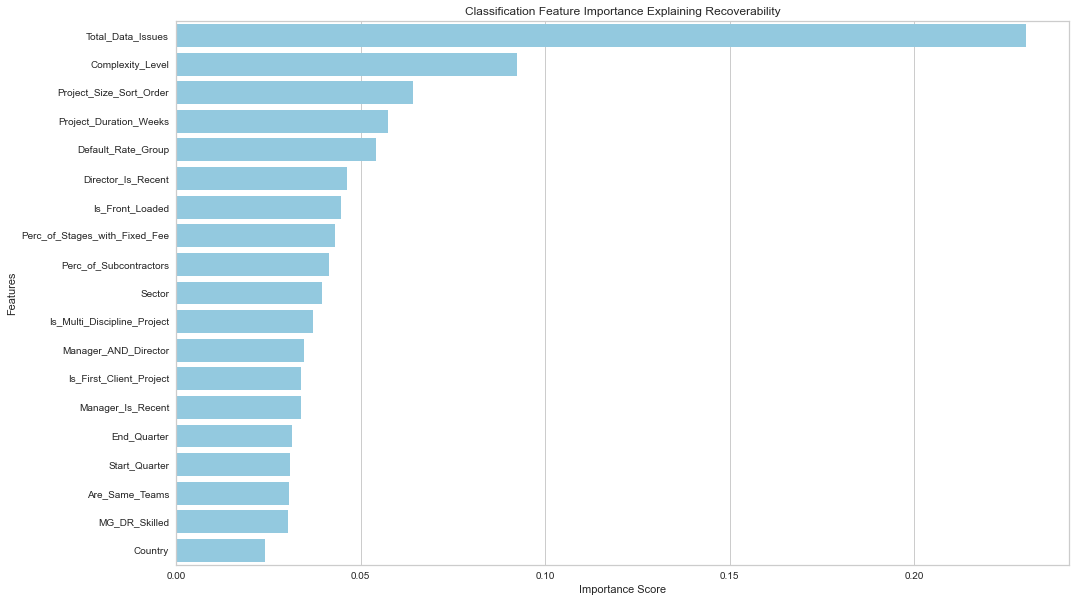

In [29]:
# Create a new DataFrame for feature importance
xgbc.feature_names = X.columns
final_feature_importance = pd.DataFrame({'Feature': xgbc.feature_names,'Importance':xgbc.feature_importances_})
final_feature_importance = final_feature_importance.sort_values(by = ['Importance'], ascending = False)

# Plotting the feature importance graph
fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(final_feature_importance['Importance'], final_feature_importance['Feature'], color = 'skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation = 'horizontal')
plt.title('Classification Feature Importance Explaining Recoverability')
plt.savefig('figures/rec/Classification Feature Importance.png')

#### 6.1.7  <a class="anchor" id="6_1_7"></a> Naive Bayes

In [13]:
# Create a Naive Bayes model
gnb = GaussianNB()

# Train the model using train set
gnb.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
gnb_y_pred = gnb.predict(X_test)

# Accuracy measures
print('Accuracy score of GNB: ' + str(round(metrics.accuracy_score(Y_test, np.round(gnb_y_pred)), 3)*100)+'%')
print('Precision score of GNB: ' + str(round(metrics.precision_score(Y_test, np.round(gnb_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of GNB: ' + str(round(metrics.recall_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of GNB: ' + str(round(metrics.f1_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of GNB: 53.300000000000004%
Precision score of GNB: 55.300000000000004%
Recall score of GNB: 53.300000000000004%
F1 of GNB: 48.4%


**Normalised independent variables**

In [68]:
# Create a Naive Bayes model
gnb = GaussianNB()

# Train the model using train set
gnb.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
gnb_y_pred = gnb.predict(X_test)

# Accuracy measures
print('Accuracy score of GNB: ' + str(round(metrics.accuracy_score(Y_test, np.round(gnb_y_pred)), 3)*100)+'%')
print('Precision score of GNB: ' + str(round(metrics.precision_score(Y_test, np.round(gnb_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of GNB: ' + str(round(metrics.recall_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of GNB: ' + str(round(metrics.f1_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of GNB: 52.400000000000006%
Precision score of GNB: 56.99999999999999%
Recall score of GNB: 52.400000000000006%
F1 of GNB: 42.9%


#### 6.1.8  <a class="anchor" id="6_1_8"></a> Linear discriminant analysis

In [14]:
# Create a linear discriminant analysis model
lda = LinearDiscriminantAnalysis(n_components = 1)

# Train the model using train set
lda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
lda_y_pred = lda.predict(X_test)

# Accuracy measures
print('Accuracy score of LDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(lda_y_pred)), 3)*100)+'%')
print('Precision score of LDA: ' + str(round(metrics.precision_score(Y_test, np.round(lda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of LDA: ' + str(round(metrics.recall_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of LDA: ' + str(round(metrics.f1_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of LDA: 59.9%
Precision score of LDA: 60.0%
Recall score of LDA: 59.9%
F1 of LDA: 59.9%


**Normalised independent variables**

In [69]:
# Create a linear discriminant analysis model
lda = LinearDiscriminantAnalysis(n_components = 1)

# Train the model using train set
lda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
lda_y_pred = lda.predict(X_test)

# Accuracy measures
print('Accuracy score of LDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(lda_y_pred)), 3)*100)+'%')
print('Precision score of LDA: ' + str(round(metrics.precision_score(Y_test, np.round(lda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of LDA: ' + str(round(metrics.recall_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of LDA: ' + str(round(metrics.f1_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of LDA: 68.10000000000001%
Precision score of LDA: 68.10000000000001%
Recall score of LDA: 68.10000000000001%
F1 of LDA: 68.10000000000001%


#### 6.1.9  <a class="anchor" id="6_1_9"></a> Quadratic discriminant analysis

In [15]:
# Create a QDA model
qda = QuadraticDiscriminantAnalysis()

# Train the model using train set
qda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
qda_y_pred = qda.predict(X_test)

# Accuracy measures
print('Accuracy score of QDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(qda_y_pred)), 3)*100)+'%')
print('Precision score of QDA: ' + str(round(metrics.precision_score(Y_test, np.round(qda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of QDA: ' + str(round(metrics.recall_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of QDA: ' + str(round(metrics.f1_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of QDA: 57.4%
Precision score of QDA: 59.0%
Recall score of QDA: 57.4%
F1 of QDA: 55.400000000000006%


**Normalised independent variables**

In [70]:
# Create a QDA model
qda = QuadraticDiscriminantAnalysis()

# Train the model using train set
qda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
qda_y_pred = qda.predict(X_test)

# Accuracy measures
print('Accuracy score of QDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(qda_y_pred)), 3)*100)+'%')
print('Precision score of QDA: ' + str(round(metrics.precision_score(Y_test, np.round(qda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of QDA: ' + str(round(metrics.recall_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of QDA: ' + str(round(metrics.f1_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of QDA: 54.400000000000006%
Precision score of QDA: 61.4%
Recall score of QDA: 54.400000000000006%
F1 of QDA: 46.2%


#### 6.1.10  <a class="anchor" id="6_1_10"></a> Mixture discriminant analysis

#### 6.1.11  <a class="anchor" id="6_1_11"></a> Regularized discriminant analysis

#### 6.1.12  <a class="anchor" id="6_1_12"></a> Flexible discriminant analysis

#### 6.1.13  <a class="anchor" id="6_1_13"></a> Neural network

#### 6.1.14  <a class="anchor" id="6_1_14"></a> Support vector machines

**Normalised independent variables**

In [6]:
# Create an SVM Classifier model
svm = SVC(kernel='linear', random_state = 1, probability=True)

# Train the model using the train set
svm.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
svm_y_pred = svm.predict(X_test)

# Accuracy measures
print('Accuracy score of SVM: ' + str(round(metrics.accuracy_score(Y_test, np.round(svm_y_pred)), 3)*100)+'%')
print('Precision score of SVM: ' + str(round(metrics.precision_score(Y_test, np.round(svm_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of SVM: ' + str(round(metrics.recall_score(Y_test, np.round(svm_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of SVM: ' + str(round(metrics.f1_score(Y_test, np.round(svm_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of SVM: 68.30000000000001%
Precision score of SVM: 68.4%
Recall score of SVM: 68.30000000000001%
F1 of SVM: 68.30000000000001%


### 6.2  <a class="anchor" id="6_2"></a> Models comparison

In [30]:
# Cross-validation

xgbc_cv = cross_val_score(xgbc, X_train, Y_train.values.ravel(), cv=6, scoring='accuracy')
print('XGB accuracy score is ' + str(round(xgbc_cv[1],3)*100) + '%')

rfc_cv = cross_val_score(rfc, X_train, Y_train.values.ravel(), cv=6, scoring='accuracy')
print('RFC accuracy score is ' + str(round(rfc_cv[1],3)*100) + '%')

svm_cv = cross_val_score(svm, X_train, Y_train.values.ravel(), cv=6, scoring='accuracy')
print('SVM accuracy score is ' + str(round(svm_cv[1],3)*100) + '%')

log_cv = cross_val_score(log, X_train, Y_train.values.ravel(), cv=6, scoring='accuracy')
print('LOG accuracy score is ' + str(round(log_cv[1],3)*100) + '%')

lda_cv = cross_val_score(lda, X_train, Y_train.values.ravel(), cv=6, scoring='accuracy')
print('LDA accuracy score is ' + str(round(lda_cv[1],3)*100) + '%')

rdg_cv = cross_val_score(rdg, X_train, Y_train.values.ravel(), cv=6, scoring='accuracy')
print('RDG accuracy score is ' + str(round(rdg_cv[1],3)*100) + '%')

XGB accuracy score is 71.8%
RFC accuracy score is 72.3%
SVM accuracy score is 68.30000000000001%
LOG accuracy score is 69.69999999999999%
LDA accuracy score is 70.19999999999999%
RDG accuracy score is 69.89999999999999%


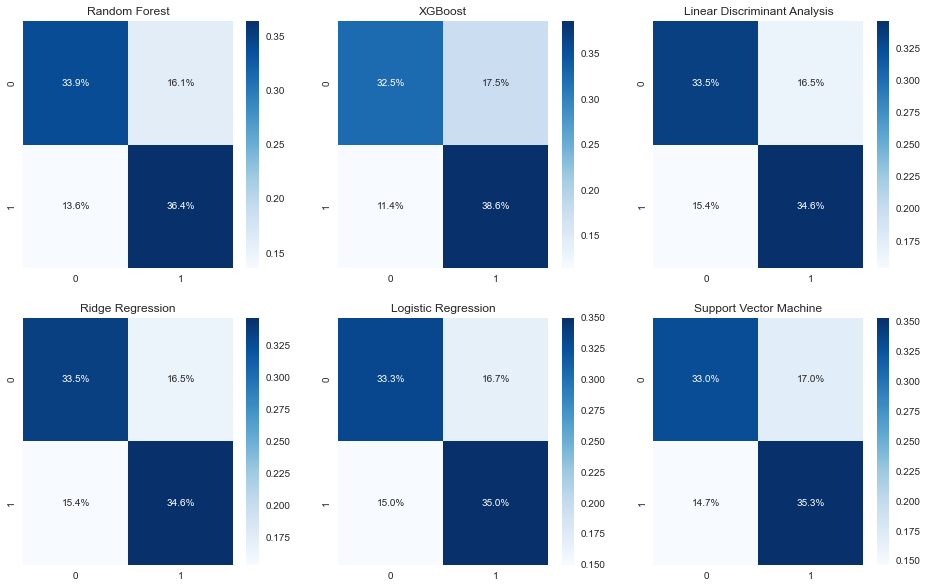

In [54]:
# Setting figure to compare the confusion matrix of each model based on heatmaps
fig, ax = plt.subplots(figsize = (16,10))
ax.set_title('Top 6 confusion matrices', size = 17, pad = 10)

# Random Forest Classifier
plt.subplot(2,3,1)
sns.heatmap(confusion_matrix(Y_test, np.round(rfc_y_pred))/np.sum(confusion_matrix(Y_test, np.round(rfc_y_pred))), annot=True, fmt='.1%',cmap='Blues')
plt.title('Random Forest')

# XGBoost Classifier
plt.subplot(2,3,2)
sns.heatmap(confusion_matrix(Y_test, np.round(xgbc_y_pred))/np.sum(confusion_matrix(Y_test, np.round(xgbc_y_pred))), annot=True, fmt='.1%',cmap='Blues')
plt.title('XGBoost')

# Linear Discriminant Analysis
plt.subplot(2,3,3)
sns.heatmap(confusion_matrix(Y_test, np.round(lda_y_pred))/np.sum(confusion_matrix(Y_test, np.round(lda_y_pred))), annot=True, fmt='.1%',cmap='Blues')
plt.title('Linear Discriminant Analysis')

# Ridge Regression
plt.subplot(2,3,4)
sns.heatmap(confusion_matrix(Y_test, np.round(rdg_y_pred))/np.sum(confusion_matrix(Y_test, np.round(rdg_y_pred))), annot=True, fmt='.1%',cmap='Blues')
plt.title('Ridge Regression')

# Logistic Regression
plt.subplot(2,3,5)
sns.heatmap(confusion_matrix(Y_test, np.round(log_y_pred))/np.sum(confusion_matrix(Y_test, np.round(log_y_pred))), annot=True, fmt='.1%',cmap='Blues')
plt.title('Logistic Regression')

# Support Vector Machine
plt.subplot(2,3,6)
sns.heatmap(confusion_matrix(Y_test, np.round(svm_y_pred))/np.sum(confusion_matrix(Y_test, np.round(svm_y_pred))), annot=True, fmt='.1%',cmap='Blues')
plt.title('Support Vector Machine')

plt.savefig('figures/rec/binary/Top 6 confusion matrices')

## Part 7: <a class="anchor" id="part7"></a> Fine-tuning

### 7.1  <a class="anchor" id="7_1"></a> XGBoost grid search

In [38]:
# Look at parameters used by our current XGBoost model
print('Parameters currently in use:\n')
pprint(xgbc.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.05,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


In [41]:
#URL: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

# Defining parameter range
xgbc_grid = {'learning_rate':[0.1],
    'n_estimators':[1000],
    'max_depth':[4,5,6],
    'min_child_weight':[6,8,10,12],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'objective':['binary:logistic'],
    'nthread':[4],
    'scale_pos_weight':[1],
    'seed':[1],
    'eval_metric':['mlogloss']}

pprint(xgbc_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'eval_metric': ['mlogloss'],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.1],
 'max_depth': [4, 5, 6],
 'min_child_weight': [6, 8, 10, 12],
 'n_estimators': [1000],
 'nthread': [4],
 'objective': ['binary:logistic'],
 'scale_pos_weight': [1],
 'seed': [1],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [42]:
# Fitting the model for grid search
xgbc_tuned = GridSearchCV(XGBClassifier(), xgbc_grid, refit = True)
xgbc_tuned.fit(X_train, Y_train.values.ravel())

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'eval_metric': ['mlogloss'],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1], 'max_depth': [4, 5, 6],
                         'min_child_weight': [6, 8, 10, 12],
                         'n_estimators': [1000], 'nthread': [4],
                         'objective': ['binary:logistic'],
                         'scale_pos_weight': [1], 'seed': [1],
                         'subsample': [0.6, 0.7, 0.8, 0.9]})

In [43]:
# Print best parameter after tuning
print(xgbc_tuned.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(xgbc_tuned.best_estimator_)

{'colsample_bytree': 0.6, 'eval_metric': 'mlogloss', 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 1000, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'seed': 1, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, ...)


In [ ]:
# Create a tuned XGBC model
xgbc_tuned = XGBClassifier(colsample_bytree=0.6, eval_metric='mlogloss',
gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=10, n_estimators=1000,
nthread=4, objective='binary:logistic', scale_pos_weight = 1, seed=1, subsample=0.8)

In [45]:
# Base model results
xgbc_base_y_pred = xgbc.predict(X_test)
xgbc_base_accuracy = round(metrics.accuracy_score(Y_test, np.round(xgbc_base_y_pred)), 3)*100
print('Accuracy of base XGBC is ' + str(xgbc_base_accuracy)+'%')

# Tuned model results
xgbc_tuned_y_pred = xgbc_tuned.predict(X_test)
xgbc_tuned_accuracy = round(metrics.accuracy_score(Y_test, xgbc_tuned_y_pred), 3)*100
print('Accuracy of tuned XGBC is ' + str(xgbc_tuned_accuracy)+'%')

# Comparison
print('Improvement of {:0.1f}%'.format(100 * (xgbc_tuned_accuracy - xgbc_base_accuracy) / xgbc_base_accuracy))

Accuracy of base XGBC is 71.1%
Accuracy of tuned XGBC is 69.3%
Improvement of -2.5%


In [49]:
# Rest of the measures
print('Precision score of tuned XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_tuned_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of tuned XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of tuned XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_tuned_y_pred), average='weighted'), 3)*100)+'%')

Precision score of tuned XGBC: 69.3%
Recall score of tuned XGBC: 69.3%
F1 of tuned XGBC: 69.3%


### 7.2  <a class="anchor" id="7_2"></a> Random forest classifier grid search

In [33]:
# Look at parameters used by our current random forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [34]:
# URL: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [35]:
rfc_tuned = RandomizedSearchCV(estimator = rfc,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 5,
                               verbose = 2,
                               random_state = 1,
                               n_jobs = -1)
                               
# Fit the random search model
rfc_tuned.fit(X_train, Y_train.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=1, verbose=2)

In [36]:
# Print best parameter after tuning
print(rfc_tuned.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(rfc_tuned.best_estimator_)

{'n_estimators': 311, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}
RandomForestClassifier(max_depth=60, min_samples_leaf=2, n_estimators=311,
                       random_state=1)


In [37]:
# Base model results
rfc_base_y_pred = rfc.predict(X_test)
rfc_base_accuracy = round(metrics.accuracy_score(Y_test, np.round(rfc_base_y_pred)), 3)*100
print('Accuracy of base RFC is ' + str(rfc_base_accuracy)+'%')

# Tuned model results
rfc_tuned = rfc_tuned.best_estimator_
rfc_tuned.fit(X_train, Y_train.values.ravel())
rfc_tuned_y_pred = rfc_tuned.predict(X_test)
rfc_tuned_accuracy = round(metrics.accuracy_score(Y_test, np.round(rfc_tuned_y_pred)), 3)*100
print('Accuracy of tuned RFC is ' + str(rfc_tuned_accuracy)+'%')

# Comparison
print('Improvement of {:0.1f}%'.format(100 * (rfc_tuned_accuracy - rfc_base_accuracy) / rfc_base_accuracy))

Accuracy of base RFC is 70.3%
Accuracy of tuned RFC is 70.0%
Improvement of -0.4%


In [46]:
# Rest of the measures
print('Precision score of tuned RFC: ' + str(round(metrics.precision_score(Y_test, np.round(rfc_tuned_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of tuned RFC: ' + str(round(metrics.recall_score(Y_test, np.round(rfc_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of tuned RFC: ' + str(round(metrics.f1_score(Y_test, np.round(rfc_tuned_y_pred), average='weighted'), 3)*100)+'%')

Precision score of tuned RFC: 70.1%
Recall score of tuned RFC: 70.0%
F1 of tuned RFC: 69.89999999999999%


### 7.3  <a class="anchor" id="7_2"></a> Support vector machines grid earch

In [47]:
# Look at parameters used by our current SVM model
print('Parameters currently in use:\n')
pprint(svm.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [17]:
#URL: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

# Defining parameter range
svm_grid = {'C': [0.1, 1, 2, 5, 10],
            'gamma': [0.01, 0.1, 1, 2, 3, 4, 5],
            'kernel': ['rbf']}
 
# Fitting the model for grid search
svm_tuned = GridSearchCV(SVC(), svm_grid, refit = True) 
svm_tuned.fit(X_train, Y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 5, 10],
                         'gamma': [0.01, 0.1, 1, 2, 3, 4, 5],
                         'kernel': ['rbf']})

In [18]:
# Print how our model looks after hyper-parameter tuning
print(svm_tuned.best_estimator_)

SVC(C=2, gamma=3)


In [19]:
# Create a tuned SVM model
svm_tuned = SVC(kernel='rbf', C = 2, gamma = 3, random_state = 1, probability=True)
svm_tuned.fit(X_train, Y_train.values.ravel())

SVC(C=2, gamma=3, probability=True, random_state=1)

In [20]:
# Base model results
svm_base_y_pred = svm.predict(X_test)
svm_base_accuracy = round(metrics.accuracy_score(Y_test, svm_base_y_pred), 3)*100
print('Accuracy of base SVM is ' + str(svm_base_accuracy)+'%')

# Tuned model results
svm_tuned_y_pred = svm_tuned.predict(X_test)
svm_tuned_accuracy = round(metrics.accuracy_score(Y_test, svm_tuned_y_pred), 3)*100
print('Accuracy of tuned SVM is ' + str(svm_tuned_accuracy)+'%')

print('Improvement of {:0.2f}%'.format(100 * (svm_tuned_accuracy - svm_base_accuracy) / svm_base_accuracy))

Accuracy of base SVM is 68.30000000000001%
Accuracy of tuned SVM is 69.19999999999999%
Improvement of 1.32%


In [21]:
# Rest of the measures
print('Precision score of tuned SVM: ' + str(round(metrics.precision_score(Y_test, np.round(svm_tuned_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of tuned SVM: ' + str(round(metrics.recall_score(Y_test, np.round(svm_tuned_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of tuned SVM: ' + str(round(metrics.f1_score(Y_test, np.round(svm_tuned_y_pred), average='weighted'), 3)*100)+'%')

Precision score of tuned SVM: 69.89999999999999%
Recall score of tuned SVM: 69.19999999999999%
F1 of tuned SVM: 69.0%


## Part 8: <a class="anchor" id="part8"></a> Ensemble learning

### 8.1  <a class="anchor" id="8_1"></a> Voting classifier

In [34]:
soft_voting = VotingClassifier(estimators=[('xgbc', xgbc), ('rfc', rfc), ('svm_t', svm_tuned)],voting='soft')
soft_voting.fit(X_train, Y_train.values.ravel())
sv_y_pred = soft_voting.predict(X_test)
print(classification_report(Y_test, np.round(sv_y_pred)))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       930
           1       0.69      0.76      0.72       930

    accuracy                           0.71      1860
   macro avg       0.71      0.71      0.71      1860
weighted avg       0.71      0.71      0.71      1860



In [35]:
print('Accuracy score of soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(sv_y_pred)), 3)*100)+'%')
print('Recall score of soft voting classifier ' + str(round(metrics.recall_score(Y_test, np.round(sv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score of soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(sv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of soft voting classifier: 70.6%
Recall score of soft voting classifier 70.6%
Precision score of soft voting classifier: 70.89999999999999%
F1 of soft voting classifier: 70.6%


In [36]:
sv_cv = cross_val_score(soft_voting, X_train, Y_train.values.ravel(), cv=5, scoring='accuracy')
print('Final accuracy score of soft voting classifier on validation dataset is ' + str(round(sv_cv[1],3)*100) + '%')

Final accuracy score of soft voting classifier on validation dataset is 71.8%


In [37]:
hard_voting = VotingClassifier(
    estimators=[('xgbc', xgbc), ('rfc', rfc), ('svm_t', svm_tuned)],
    voting='hard')

hard_voting.fit(X_train, Y_train.values.ravel())
hv_y_pred = hard_voting.predict(X_test)
print(classification_report(Y_test, np.round(hv_y_pred)))

              precision    recall  f1-score   support

           0       0.74      0.65      0.70       930
           1       0.69      0.77      0.73       930

    accuracy                           0.71      1860
   macro avg       0.72      0.71      0.71      1860
weighted avg       0.72      0.71      0.71      1860



In [38]:
print('Accuracy score of hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(hv_y_pred)), 3)*100)+'%')
print('Recall score of hard voting classifier ' + str(round(metrics.recall_score(Y_test, np.round(hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score of hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 of hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of hard voting classifier: 71.3%
Recall score of hard voting classifier 71.3%
Precision score of hard voting classifier: 71.6%
F1 of hard voting classifier: 71.2%


In [39]:
hv_cv = cross_val_score(hard_voting, X_train, Y_train.values.ravel(), cv=5, scoring='accuracy')
print('Final accuracy score of hard voting classifier on validation dataset is ' + str(round(hv_cv[1],3)*100) + '%')

Final accuracy score of hard voting classifier on validation dataset is 72.39999999999999%


### 8.2  <a class="anchor" id="8_2"></a> Stacking

#### 8.2.1  <a class="anchor" id="8_2_1"></a> Top 9 models

See results for **base XGBC** in pr_run_2, **base RFC** in pr_run_3.

In [82]:
def get_stacking():
	# Define the base models
	level9 = list()
	level9.append(('dtc', dtc))
	level9.append(('knn', knn_100))
	level9.append(('rdg', rdg))
	level9.append(('lda', lda))
	level9.append(('log', log))
	level9.append(('svm_t', svm_tuned))
	level9.append(('rfc', rfc))
	level9.append(('hv', hard_voting))
	level9.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on hard voting classifier
	model = StackingClassifier(estimators=level9, final_estimator=hard_voting, cv=5)
	return model

# Define the base models separately
level9 = list()
level9.append(('dtc', dtc))
level9.append(('knn', knn_100))
level9.append(('rdg', rdg))
level9.append(('lda', lda))
level9.append(('log', log))
level9.append(('svm_t', svm_tuned))
level9.append(('rfc', rfc))
level9.append(('hv', hard_voting))
level9.append(('xgbc', xgbc))
level9.append(('stacking', get_stacking()))

In [83]:
# Define the stacking ensemble learnt on hard voting classifier
stack9_hv = StackingClassifier(estimators=level9, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack9_hv = stack9_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack9_hv_y_pred = stack9_hv.predict(X_test)

In [84]:
# Accuracy measures
print('Accuracy score with 9 models learnt on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack9_hv_y_pred)), 3)*100)+'%')
print('Recall score with 9 models learnt on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack9_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 9 models learnt on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack9_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 9 models learnt on hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack9_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 9 models learnt on hard voting classifier: 78.60000000000001%
Recall score with 9 models learnt on hard voting classifier: 78.60000000000001%
Precision score with 9 models learnt on hard voting classifier: 78.9%
F1 score with 9 models learnt on hard voting classifier: 78.5%


#### 8.2.2  <a class="anchor" id="8_2_2"></a> Top 8 models

See results for **base XGBC** in pr_run_2, **base RFC** in pr_run_3.

In [79]:
def get_stacking():
	# Define the base models
	level8 = list()
	level8.append(('knn', knn_100))
	level8.append(('rdg', rdg))
	level8.append(('lda', lda))
	level8.append(('log', log))
	level8.append(('svm_t', svm_tuned))
	level8.append(('rfc', rfc))
	level8.append(('hv', hard_voting))
	level8.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on hard voting classifier
	model = StackingClassifier(estimators=level8, final_estimator=hard_voting, cv=5)
	return model

# Define the base models separately
level8 = list()
level8.append(('knn', knn_100))
level8.append(('rdg', rdg))
level8.append(('lda', lda))
level8.append(('log', log))
level8.append(('svm_t', svm_tuned))
level8.append(('rfc', rfc))
level8.append(('hv', hard_voting))
level8.append(('xgbc', xgbc))
level8.append(('stacking', get_stacking()))

In [80]:
# Define the stacking ensemble learnt on hard voting classifier
stack8_hv = StackingClassifier(estimators=level8, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack8_hv = stack8_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack8_hv_y_pred = stack8_hv.predict(X_test)

In [81]:
# Accuracy measures
print('Accuracy score with 8 models learnt on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack8_hv_y_pred)), 3)*100)+'%')
print('Recall score with 8 models learnt on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack8_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 8 models learnt on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack8_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 8 models learnt on hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack8_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 8 models learnt on hard voting classifier: 78.5%
Recall score with 8 models learnt on hard voting classifier: 78.5%
Precision score with 8 models learnt on hard voting classifier: 78.8%
F1 score with 8 models learnt on hard voting classifier: 78.5%


#### 8.2.3  <a class="anchor" id="8_2_3"></a> Top 7 models

See results for **base XGBC** in pr_run_2, **base RFC** in pr_run_3.

In [ ]:
def get_stacking():
	# Define the base models
	level7 = list()
	level7.append(('rdg', rdg))
	level7.append(('lda', lda))
	level7.append(('log', log))
	level7.append(('svm_t', svm_tuned))
	level7.append(('rfc', rfc))
	level7.append(('hv', hard_voting))
	level7.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base soft voting classifier
	model = StackingClassifier(estimators=level7, final_estimator=soft_voting, cv=5)
	return model

# Define the base models separately
level7 = list()
level7.append(('rdg', rdg))
level7.append(('lda', lda))
level7.append(('log', log))
level7.append(('svm_t', svm_tuned))
level7.append(('rfc', rfc))
level7.append(('hv', hard_voting))
level7.append(('xgbc', xgbc))
level7.append(('stacking', get_stacking()))

In [87]:
# Define the stacking ensemble learnt on base XGBC
stack7_sv = StackingClassifier(estimators=level7, final_estimator=soft_voting, cv=5)

# Fit the model on all available data
stack7_sv = stack7_sv.fit(X, Y.values.ravel())

# Predict the response for test set
stack7_sv_y_pred = stack7_sv.predict(X_test)

In [88]:
# Accuracy measures
print('Accuracy score with 7 models based on soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack7_sv_y_pred)), 3)*100)+'%')
print('Recall score with 7 models based on soft voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack7_sv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 7 models based on soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack7_sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 7 models based on soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack7_sv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 7 models based on soft voting classifier: 77.8%
Recall score with 7 models based on soft voting classifier: 77.8%
Precision score with 7 models based on soft voting classifier: 77.8%
F1 score with 7 models based on soft voting classifier: 77.8%


In [76]:
def get_stacking():
	# Define the base models
	level7 = list()
	level7.append(('rdg', rdg))
	level7.append(('lda', lda))
	level7.append(('log', log))
	level7.append(('svm_t', svm_tuned))
	level7.append(('rfc', rfc))
	level7.append(('hv', hard_voting))
	level7.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base hard voting classifier
	model = StackingClassifier(estimators=level7, final_estimator=hard_voting, cv=5)
	return model

# Define the base models separately
level7 = list()
level7.append(('rdg', rdg))
level7.append(('lda', lda))
level7.append(('log', log))
level7.append(('svm_t', svm_tuned))
level7.append(('rfc', rfc))
level7.append(('hv', hard_voting))
level7.append(('xgbc', xgbc))
level7.append(('stacking', get_stacking()))

In [77]:
# Define the model
stack7_hv = StackingClassifier(estimators=level7, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack7_hv = stack7_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack7_hv_y_pred = stack7_hv.predict(X_test)

In [78]:
# Accuracy measures
print('Accuracy score with 7 models based on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack7_hv_y_pred)), 3)*100)+'%')
print('Recall score with 7 models based on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack7_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 7 models based on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack7_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 7 models based on hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack7_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 7 models based on hard voting classifier: 78.7%
Recall score with 7 models based on hard voting classifier: 78.7%
Precision score with 7 models based on hard voting classifier: 79.0%
F1 score with 7 models based on hard voting classifier: 78.60000000000001%


#### 8.2.4  <a class="anchor" id="8_2_4"></a> Top 6 models

See results for **base XGBC** and **base RFC** in pr_run_2.

In [73]:
def get_stacking():
	# Define the base models
	level6 = list()
	level6.append(('rdg', rdg))
	level6.append(('log', log))
	level6.append(('svm_t', svm_tuned))
	level6.append(('rfc', rfc))
	level6.append(('hv', hard_voting))
	level6.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base hard voting classifier
	model = StackingClassifier(estimators=level6, final_estimator=hard_voting, cv=5)
	return model

# Define the base models separately
level6 = list()
level6.append(('rdg', rdg))
level6.append(('log', log))
level6.append(('svm_t', svm_tuned))
level6.append(('rfc', rfc))
level6.append(('hv', hard_voting))
level6.append(('xgbc', xgbc))
level6.append(('stacking', get_stacking()))

In [74]:
# Define the model
stack6_hv = StackingClassifier(estimators=level6, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack6_hv = stack6_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack6_hv_y_pred = stack6_hv.predict(X_test)

In [75]:
# Accuracy measures
print('Accuracy score with 6 models learnt on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack6_hv_y_pred)), 3)*100)+'%')
print('Recall score  with 6 models learnt on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack6_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score  with 6 models learnt on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack6_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 6 models learnt on soft hard classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack6_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 6 models learnt on hard voting classifier: 78.9%
Recall score  with 6 models learnt on hard voting classifier: 78.9%
Precision score  with 6 models learnt on hard voting classifier: 79.2%
F1 score with 6 models learnt on soft hard classifier: 78.8%


#### 8.2.5  <a class="anchor" id="8_2_4"></a> Top 5 models

See results for **base RFC** in pr_run_3.

In [53]:
def get_stacking():
	# Define the base models
	level5 = list()
	level5.append(('log', log))
	level5.append(('svm_t', svm_tuned))
	level5.append(('rfc', rfc))
	level5.append(('hv', hard_voting))
	level5.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on hard voting classifier
	model = StackingClassifier(estimators=level5, final_estimator=hard_voting, cv=5)
	return model

# Define the base models separately
level5 = list()
level5.append(('log', log))
level5.append(('svm_t', svm_tuned))
level5.append(('rfc', rfc))
level5.append(('hv', hard_voting))
level5.append(('xgbc', xgbc))
level5.append(('stacking', get_stacking()))

In [54]:
# Define the stacking ensemble learnt on hard voting classifier
stack5_hv = StackingClassifier(estimators=level5, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack5_hv = stack5_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack5_hv_y_pred = stack5_hv.predict(X_test)

In [55]:
# Accuracy measures
print('Accuracy score with 5 models learnt on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack5_hv_y_pred)), 3)*100)+'%')
print('Recall score with 5 models learnt on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack5_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 5 models learnt on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack5_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 5 models learnt on hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack5_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 5 models learnt on hard voting classifier: 79.10000000000001%
Recall score with 5 models learnt on hard voting classifier: 79.10000000000001%
Precision score with 5 models learnt on hard voting classifier: 79.4%
F1 score with 5 models learnt on hard voting classifier: 79.0%


In [56]:
def get_stacking():
	# Define the base models
	level5 = list()
	level5.append(('log', log))
	level5.append(('svm_t', svm_tuned))
	level5.append(('rfc', rfc))
	level5.append(('hv', hard_voting))
	level5.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base XGBoost classifier
	model = StackingClassifier(estimators=level5, final_estimator=xgbc, cv=5)
	return model

# Define the base models separately
level5 = list()
level5.append(('log', log))
level5.append(('svm_t', svm_tuned))
level5.append(('rfc', rfc))
level5.append(('hv', hard_voting))
level5.append(('xgbc', xgbc))
level5.append(('stacking', get_stacking()))

In [57]:
# Define the stacking ensemble learnt on base XGBoost classifier
stack5_xgbc = StackingClassifier(estimators=level5, final_estimator=xgbc, cv=5)

# Fit the model on all available data
stack5_xgbc = stack5_xgbc.fit(X, Y.values.ravel())

# Predict the response for test set
stack5_xgbc_y_pred = stack5_xgbc.predict(X_test)

In [58]:
# Accuracy measures
print('Accuracy score with 5 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack5_xgbc_y_pred)), 3)*100)+'%')
print('Recall score with 5 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(stack5_xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 5 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(stack5_xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 5 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(stack5_xgbc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 5 models learnt on base XGBC: 77.60000000000001%
Recall score with 5 models learnt on base XGBC: 77.60000000000001%
Precision score with 5 models learnt on base XGBC: 77.7%
F1 score with 5 models learnt on base XGBC: 77.60000000000001%


#### 8.2.6  <a class="anchor" id="8_2_6"></a> Top 4 models

See results for **HV** in pr_run_2, **base XGBC and base RFC** in pr_run_3.

In [70]:
def get_stacking():
	# Define the base models
	level4 = list()
	level4.append(('svm_t', svm_tuned))
	level4.append(('rfc', rfc))
	level4.append(('sv', soft_voting))
	level4.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on soft voting classifier
	model = StackingClassifier(estimators=level4, final_estimator=soft_voting, cv=5)
	return model

# Define the base models separately
level4 = list()
level4.append(('svm_t', svm_tuned))
level4.append(('rfc', rfc))
level4.append(('sv', soft_voting))
level4.append(('xgbc', xgbc))
level4.append(('stacking', get_stacking()))

In [71]:
# Define the stacking ensemble learnt on soft voting classifier
stack4_sv = StackingClassifier(estimators=level4, final_estimator=soft_voting, cv=5)

# Fit the model on all available data
stack4_sv = stack4_sv.fit(X, Y.values.ravel())

# Predict the response for test set
stack4_sv_y_pred = stack4_sv.predict(X_test)

In [72]:
# Accuracy measures
print('Accuracy score with 4 models learnt on soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack4_sv_y_pred)), 3)*100)+'%')
print('Recall score with 4 models learnt on soft voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack4_sv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 4 models learnt on soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack4_sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 4 models learnt on soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack4_sv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 4 models learnt on soft voting classifier: 79.80000000000001%
Recall score with 4 models learnt on soft voting classifier: 79.80000000000001%
Precision score with 4 models learnt on soft voting classifier: 79.80000000000001%
F1 score with 4 models learnt on soft voting classifier: 79.80000000000001%


#### 8.2.7  <a class="anchor" id="8_2_7"></a> Top 3 models

See results for **base XGBC, base RFC with HV** in pr_run_2.

In [41]:
def get_stacking():
	# Define the base models
	level3 = list()
	level3.append(('rfc', rfc))
	level3.append(('hv', hard_voting))
	level3.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on hard voting classifier
	model = StackingClassifier(estimators=level3, final_estimator=hard_voting, cv=5)
	return model

# Define the base models separately
level3 = list()
level3.append(('rfc', rfc))
level3.append(('xgbc', xgbc))
level3.append(('hv', hard_voting))
level3.append(('stacking', get_stacking()))

In [42]:
# Define the stacking ensemble learnt on hard voting classifier
stack3_hv = StackingClassifier(estimators=level3, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack3_hv = stack3_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack3_hv_y_pred = stack3_hv.predict(X_test)

In [45]:
# Accuracy measures
print('Accuracy score with 3 models learnt on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack3_hv_y_pred)), 3)*100)+'%')
print('Recall score with 3 models learnt on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack3_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 3 models learnt on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack3_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 3 models learnt on soft hard classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack3_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 3 models learnt on hard voting classifier: 81.6%
Recall score with 3 models learnt on hard voting classifier: 81.6%
Precision score with 3 models learnt on hard voting classifier: 81.69999999999999%
F1 score with 3 models learnt on soft hard classifier: 81.5%


In [48]:
def get_stacking():
	# Define the base models
	level3 = list()
	level3.append(('rfc', rfc))
	level3.append(('sv', soft_voting))
	level3.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on soft voting classifier
	model = StackingClassifier(estimators=level3, final_estimator=soft_voting, cv=5)
	return model

# Define the base models separately
level3 = list()
level3.append(('rfc', rfc))
level3.append(('sv', soft_voting))
level3.append(('xgbc', xgbc))
level3.append(('stacking', get_stacking()))

In [49]:
# Define the stacking ensemble learnt on soft voting classifier
stack3_sv = StackingClassifier(estimators=level3, final_estimator=soft_voting, cv=5)

# Fit the model on all available data
stack3_sv = stack3_sv.fit(X, Y.values.ravel())

# Predict the response for test set
stack3_sv_y_pred = stack3_sv.predict(X_test)

In [50]:
# Accuracy measures
print('Accuracy score with 3 models learnt on soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack3_sv_y_pred)), 3)*100)+'%')
print('Recall score with 3 models learnt on soft voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack3_sv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 3 models learnt on soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack3_sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 3 models learnt on soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack3_sv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 3 models learnt on soft voting classifier: 82.8%
Recall score with 3 models learnt on soft voting classifier: 82.8%
Precision score with 3 models learnt on soft voting classifier: 82.89999999999999%
F1 score with 3 models learnt on soft voting classifier: 82.8%


In [79]:
def get_stacking():
	# Define the base models
	level3 = list()
	level3.append(('rfc', rfc))
	level3.append(('sv', soft_voting))
	level3.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base random forest classifier
	model = StackingClassifier(estimators=level3, final_estimator=rfc, cv=5)
	return model

# Define the base models separately
level3 = list()
level3.append(('rfc', rfc))
level3.append(('sv', soft_voting))
level3.append(('xgbc', xgbc))
level3.append(('stacking', get_stacking()))

In [81]:
# Define the stacking ensemble learnt on base random forest classifier
stack3_rfc = StackingClassifier(estimators=level3, final_estimator=rfc, cv=5)

# Fit the model on all available data
stack3_rfc = stack3_rfc.fit(X, Y.values.ravel())

# Predict the response for test set
stack3_rfc_y_pred = stack3_rfc.predict(X_test)

In [82]:
# Accuracy measures
print('Accuracy score with 3 models learnt on base RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack3_rfc_y_pred)), 3)*100)+'%')
print('Recall score with 3 models learnt on base RFC: ' + str(round(metrics.recall_score(Y_test, np.round(stack3_rfc_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 3 models learnt on base RFC: ' + str(round(metrics.precision_score(Y_test, np.round(stack3_rfc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 3 models learnt on base RFC: ' + str(round(metrics.f1_score(Y_test, np.round(stack3_rfc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 3 models learnt on base RFC: 77.60000000000001%
Recall score with 3 models learnt on base RFC: 77.60000000000001%
Precision score with 3 models learnt on base RFC: 77.8%
F1 score with 3 models learnt on base RFC: 77.60000000000001%


#### 8.2.8  <a class="anchor" id="8_2_8"></a> Top 2 models

See results for **base XGBC** in pr_run_2, **base RFC** in pr_run_3.

In [85]:
def get_stacking():
	# Define the base models
	level2 = list()
	level2.append(('xgbc', xgbc))
	level2.append(('hv', hard_voting))

	# Define the stacking ensemble
	model = StackingClassifier(estimators=level2, final_estimator=hard_voting, cv=5)
	return model

# Define the base models separately
level2 = list()
level2.append(('xgbc', xgbc))
level2.append(('hv', hard_voting))
level2.append(('stacking', get_stacking()))

In [86]:
# Define the stacking ensemble learnt on hard voting classifier
stack2_hv = StackingClassifier(estimators=level2, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack2_hv = stack2_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack2_hv_y_pred = stack2_hv.predict(X_test)

In [87]:
# Accuracy measures
print('Accuracy score with 2 models learnt on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack2_hv_y_pred)), 3)*100)+'%')
print('Recall score with 2 models learnt on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack2_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 2 models learnt on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack2_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 2 models learnt on hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack2_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 2 models learnt on hard voting classifier: 80.30000000000001%
Recall score with 2 models learnt on hard voting classifier: 80.30000000000001%
Precision score with 2 models learnt on hard voting classifier: 80.60000000000001%
F1 score with 2 models learnt on hard voting classifier: 80.2%


In [89]:
def get_stacking():
	# Define the base models
	level2 = list()
	level2.append(('xgbc', xgbc))
	level2.append(('sv', soft_voting))

	# Define the stacking ensemble
	model = StackingClassifier(estimators=level2, final_estimator=soft_voting, cv=5)
	return model

# Define the base models separately
level2 = list()
level2.append(('xgbc', xgbc))
level2.append(('sv', soft_voting))
level2.append(('stacking', get_stacking()))

In [90]:
# Define the stacking ensemble learnt on soft voting classifier
stack2_sv = StackingClassifier(estimators=level2, final_estimator=soft_voting, cv=5)

# Fit the model on all available data
stack2_sv = stack2_sv.fit(X, Y.values.ravel())

# Predict the response for test set
stack2_sv_y_pred = stack2_sv.predict(X_test)

In [91]:
# Accuracy measures
print('Accuracy score with 2 models learnt on soft voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack2_sv_y_pred)), 3)*100)+'%')
print('Recall score with 2 models learnt on soft voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack2_sv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 2 models learnt on soft voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack2_sv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 2 models learnt on soft voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack2_sv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 2 models learnt on soft voting classifier: 88.7%
Recall score with 2 models learnt on soft voting classifier: 88.7%
Precision score with 2 models learnt on soft voting classifier: 88.8%
F1 score with 2 models learnt on soft voting classifier: 88.6%


In [130]:
# Cross-validation of the final model
final_cv_ac = cross_val_score(stack2_sv, X_train, Y_train.values.ravel(), cv=6, scoring='accuracy')
print('Final accuracy on 6-fold cross-validation datasets is ' + str(round(final_cv_ac[1],3)*100) + '%')

Final accuracy on 6-fold cross-validation datasets is 72.39999999999999%


In [131]:
final_cv_rec = cross_val_score(stack2_sv, X_train, Y_train.values.ravel(), cv=6, scoring='recall')
print('Final recall on 6-fold cross-validation datasets is ' + str(round(final_cv_rec[1],3)*100) + '%')

Final recall on 6-fold cross-validation datasets is 77.7%


In [124]:
final_cv_pr = cross_val_score(stack2_sv, X_train, Y_train.values.ravel(), cv=6, scoring='precision')
print('Final precision on 6-fold cross-validation datasets is ' + str(round(final_cv_pr[1],3)*100) + '%')

Final precision on 6-fold cross-validation datasets is 70.3%


In [129]:
final_cv_f1 = cross_val_score(stack2_sv, X_train, Y_train.values.ravel(), cv=6, scoring='f1')
print('Final F1 score on 6-fold cross-validation datasets is ' + str(round(final_cv_f1[1],3)*100) + '%')

Final F1 score on 6-fold cross-validation datasets is 73.8%


In [144]:
# Rename the model for an easier recall
final_model = stack2_sv

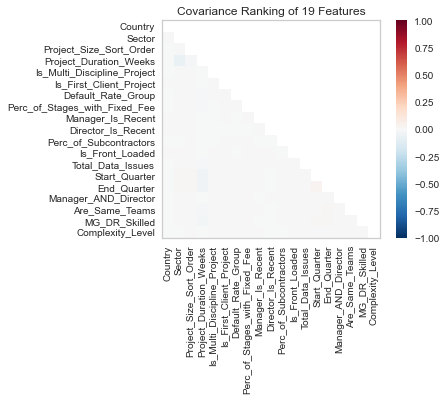

<AxesSubplot:title={'center':'Covariance Ranking of 19 Features'}>

In [141]:
# URL: https://github.com/DistrictDataLabs/yellowbrick

features_visualizer = Rank2D(features = final_model.feature_names_in_, algorithm = 'covariance')
features_visualizer.fit(X, Y)
features_visualizer.transform(X)
features_visualizer.show()

In [142]:
final_model.final_estimator_

VotingClassifier(estimators=[('xgbc',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.05, max_bin=256,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=1,
                                            reg_alpha=0, reg_lambda=1, ...)),
                             ('rfc', RandomForestClassifier(random_state=1)),
                             ('svm_t',
                              SVC(C=2, gamma=3, probability=True,
                                  random_state=1))],
                 voting='soft')

## Part 9: <a class="anchor" id="part9"></a> Evaluation of the final model

### 9.1  <a class="anchor" id="9_1"></a> Confusion matrix

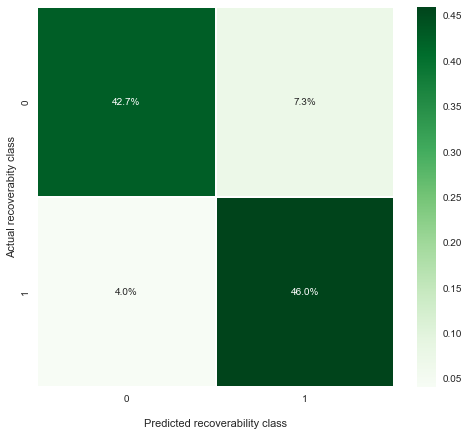

In [126]:
# Logistic model confusion matrix heatmap
plt.subplots(figsize = (8,7))
ax = sns.heatmap(confusion_matrix(Y_test, stack2_sv_y_pred)/np.sum(confusion_matrix(Y_test, stack2_sv_y_pred)), annot=True, fmt='.1%',cmap='Greens',  linewidths=.2)
ax.set_xlabel('\nPredicted recoverability class')
ax.set_ylabel('Actual recoverabity class');
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])
plt.savefig('figures/rec/binary/Confusion matrix for binary classification.png')

In [100]:
# URL: https://pythonawesome.com/multi-class-confusion-matrix-library-in-python/#:~:text=PyCM%20is%20a%20multi-class%20confusion%20matrix%20library%20written,that%20supports%20most%20classes%20and%20overall%20statistics%20parameters.

y_actu = Y_test['Rec_Class'].to_numpy()
cm = ConfusionMatrix(actual_vector=y_actu, predict_vector=stack2_sv_y_pred)
cm.classes
print(cm)

Predict   0         1         
Actual
0         794       136       

1         75        855       





Overall Statistics : 

95% CI                                                            (0.87215,0.90097)
ACC Macro                                                         0.88656
ARI                                                               0.5975
AUNP                                                              0.88656
AUNU                                                              0.88656
Bangdiwala B                                                      0.78706
Bennett S                                                         0.77312
CBA                                                               0.85826
CSI                                                               0.77479
Chi-Squared                                                       1116.54773
Chi-Squared DF                                                    1
Conditional Entropy                                

MULTICLASSIFICATION

**Class 0 - low recoverability projects**
* AUC = 0.52 which is poor.
* F1 = 0.09 which is very poor.
<br />
<br />

**Class 1 - average recoverability projects**
* AUC of class 1 is 0.79 which is good.
* F1 of class 1 is 0.78 which is good.
<br />
<br />

**Class 2 - high recoverability projects**
* AUC of class 2 is 0.82 which is very good.
* F1 of class 2 is 0.82 which is very good.

__________________________________________
BINARY CLASSIFICATION

**Class 0 - unrecoverable projects**
* AUC = 0.89 which is very good.
* F1 = 0.88 which is very good.
<br />
<br />

**Class 1 - recoverable projects**
* AUC = 0.89 which is very good.
* F1 = 0.89 which is very good.

### 9.2  <a class="anchor" id="9_2"></a> Cost matrix

In [98]:
# URL: https://imbalanced-ensemble.readthedocs.io/en/latest/auto_examples/classification/plot_cost_matrix.html

init_kwargs = {
    'n_estimators': 5,
    'random_state': 1,
}
adacost_clf = imbens.ensemble.AdaCostClassifier(**init_kwargs)

cost_matrices = {}

def plot_cost_matrix(cost_matrix, title:str, **kwargs):
    ax = sns.heatmap(data=cost_matrix, **kwargs)
    ax.set_ylabel('Predicted class')
    ax.set_xlabel('Ground truth')
    ax.set_title(title)

adacost_clf.fit(X_train, Y_train.values.ravel())

AdaCostClassifier(n_estimators=5, random_state=1)

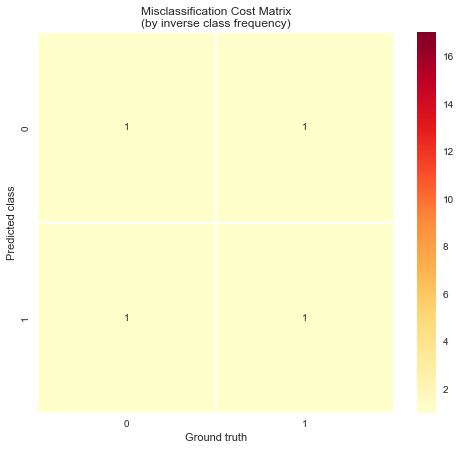

In [119]:
# Default cost matrix
plt.subplots(figsize = (8,7))
title = 'Misclassification Cost Matrix\n(by inverse class frequency)'
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=17, linewidths=.2)
plt.savefig('figures/rec/Misclassification cost matrix for binary classification.png')

### 9.3  <a class="anchor" id="9_3"></a> ROC curve

No Skill: ROC AUC=0.500
Final model: ROC AUC=0.945


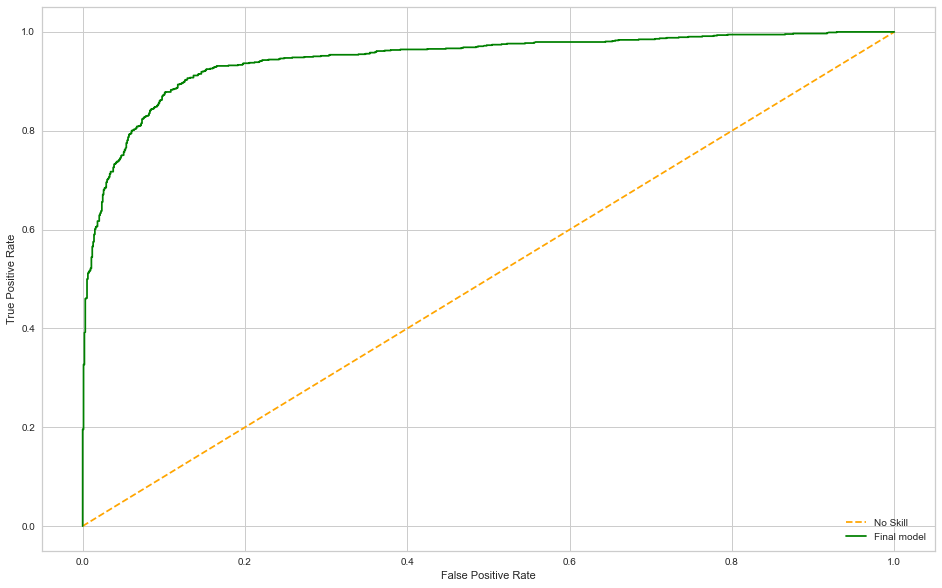

In [127]:
fig, ax = plt.subplots(figsize = (16,10))

# Generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# Predict probabilities
final_probs = stack2_sv.predict_proba(X_test)

# Keep probabilities for the positive outcome only
final_probs = final_probs[:, 1]

# Calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
final_auc = roc_auc_score(Y_test, final_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Final model: ROC AUC=%.3f' % (final_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, final_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color='orange')
pyplot.plot(lr_fpr, lr_tpr, label='Final model', color='green')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend(loc='lower right')
fig.savefig('figures/rec/binary/ROC curve for binary classification.png', dpi=fig.dpi)

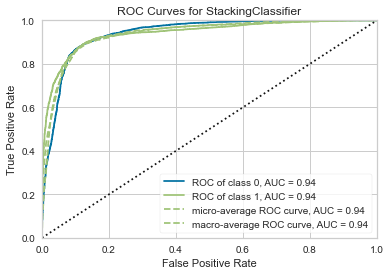

In [247]:
# URL: https://github.com/DistrictDataLabs/yellowbrick
visualizer = ROCAUC(final_model)
visualizer.fit(X,Y)
visualizer.score(X,Y)
visualizer.show()
fig.savefig('figures/rec/binary/All ROC curves for binary classification.png', dpi=fig.dpi)

### 9.4  <a class="anchor" id="9_4"></a> Precision-recall curve

Final model scores: 
F1=0.890 
AUC=0.952


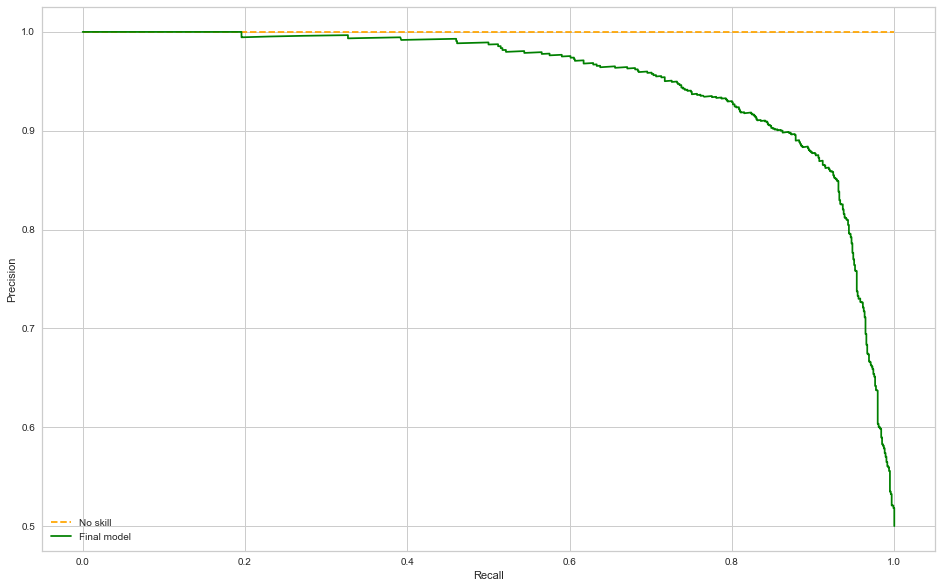

In [128]:
fig, ax = plt.subplots(figsize = (16,10))

# Predict class values
yhat = final_model.predict(X_test)
final_precision, final_recall, _ = precision_recall_curve(Y_test, final_probs)
final_f1, final_auc = f1_score(Y_test, yhat), auc(final_recall, final_precision)

# Summarize scores
print('Final model scores: \nF1=%.3f \nAUC=%.3f' % (final_f1, final_auc))

# Plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No skill', color='orange')
pyplot.plot(final_recall, final_precision, label='Final model', color='green')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
fig.savefig('figures/rec/binary/Precision-recall curve for binary classification.png', dpi=fig.dpi)

### 9.5  <a class="anchor" id="9_5"></a> Feature importance

Reminder of the final model's structure: stack2_sv.

In [158]:
def get_stacking():
	# Define the base models
	level2 = list()
	level2.append(('xgbc', xgbc))
	level2.append(('sv', soft_voting))

	# Define the stacking ensemble
	model = StackingClassifier(estimators=level2, final_estimator=soft_voting, cv=5)
	return model

# Define the base models separately
level2 = list()
level2.append(('xgbc', xgbc))
level2.append(('sv', soft_voting))
level2.append(('stacking', get_stacking()))

In [221]:
final_model = stack2_sv
final_model.final_estimator_

VotingClassifier(estimators=[('xgbc',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.05, max_bin=256,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=1,
                                            reg_alpha=0, reg_lambda=1, ...)),
                             ('rfc', RandomForestClassifier(random_state=1)),
                             ('svm_t',
                              SVC(C=2, gamma=3, probability=True,
                                  random_state=1))],
                 voting='soft')

______________________________________

First, I tried to find out feature importance of the final model manually, by finding the average of all feature importances of the stacked models.

In [242]:
features = xgbc.feature_names_in_
features_xgbc = {}
for i,v in enumerate(features):
    features_xgbc[i] = v
features_df = pd.DataFrame([{'feature_index': i, 'feature_name': v} for (i, v) in features_xgbc.items()])

importance = xgbc.feature_importances_
importance_xgbc = {}
for i,v in enumerate(importance):
    importance_xgbc[i] = v
importance_df = pd.DataFrame([{'feature_index': i, 'imp_score_xgbc': v} for (i, v) in importance_xgbc.items()])

importance_xgbc = pd.merge(features_df, importance_df, on='feature_index')

In [226]:
importance = rfc.feature_importances_
importance_rfc = {}
for i,v in enumerate(importance):
    importance_rfc[i] = v

importance_rfc = pd.DataFrame([{'feature_index': i, 'imp_score_rfc': v} for (i, v) in importance_rfc.items()])

In [234]:
importance = preprocessing.normalize(svm.coef_)
importance_svm = {}
for i,v in enumerate(importance):
    importance_svm[i] = v

importance_df = pd.DataFrame([{'feature_index': i, 'imp_score': v} for (i, v) in importance_svm.items()])
importance_svm

,feature_index,imp_score
0,0,"[0.08499039636660134, 0.011572898668704135, -0..."


______________________________________

Automatic approach found later is successfully tested below.

In [243]:
final_model = stack2_sv
f = permutation_importance(final_model, X, Y)['importances_mean']
fimpo = f / f.sum() * 100

In [244]:
test = pd.DataFrame(data=fimpo)
test.rename(columns = {0:'feature_imp'}, inplace = True)
test.reset_index(inplace=True)

features = final_model.feature_names_in_
features_dict = {}
for i,v in enumerate(features):
    features_dict[i] = v
features_df = pd.DataFrame([{'index': i, 'feature_name': v} for (i, v) in features_dict.items()])

feature_imp = pd.merge(features_df, test, on='index')
feature_imp.sort_values(by = 'feature_imp', ascending=False, inplace = True)
feature_imp

,index,feature_name,feature_imp
12,12,Total_Data_Issues,27.126216
2,2,Project_Size_Sort_Order,16.511965
18,18,Complexity_Level,7.974459
6,6,Default_Rate_Group,7.580734
7,7,Perc_of_Stages_with_Fixed_Fee,7.276770
1,1,Sector,5.236745
3,3,Project_Duration_Weeks,5.118423
14,14,End_Quarter,4.412575
13,13,Start_Quarter,4.224892
16,16,Are_Same_Teams,4.151451


In [246]:
feature_imp['feature_imp'].sum()

99.99999999999999

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


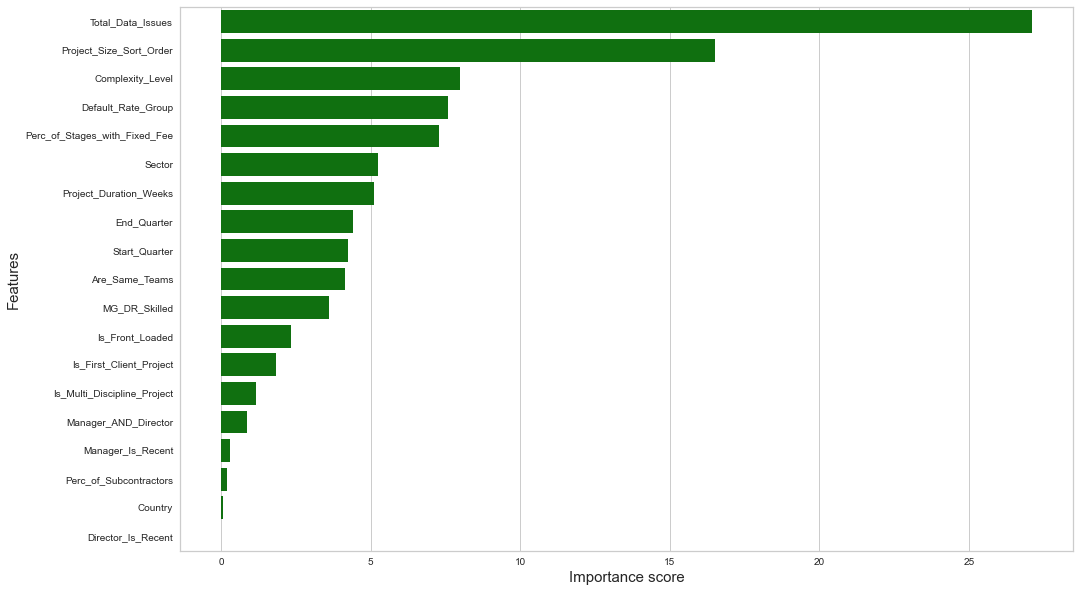

In [245]:
fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(feature_imp['feature_imp'], feature_imp['feature_name'], color = 'green')
plt.xlabel('Importance score', size = 15)
plt.ylabel('Features', size = 15)
plt.xticks(rotation = 'horizontal')
plt.savefig('figures/rec/binary/Automated feature importance of the best model.png')